In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy.optimize

In [67]:
def func1(x,a,b):
    return a * (x**b)

def func2(x,a,b):
    return a * np.log(x)*(x**b)

In [82]:
def func3(x,a,b,c):
    return (a*x**b +c)

In [68]:
n = np.array([100,316,1000,3160,10000])

t = np.array([0.004765, 0.030038, 0.335482, 6.14532, 190.95])

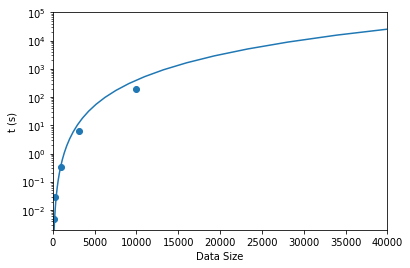

In [69]:
fig = figure()
ax = plt.gca()
ax.scatter(n,t)
ax.set_yscale("log")
#ax.set_xscale("log")
ylim(0.002,1e5)
xlim(0,40000)

xlabel("Data Size")
ylabel("t (s)")

x = np.logspace(2,6,50)
y = 0.0000000004 * x**3

ax.plot(x,y)

In [71]:
popt1, pcov1 =  scipy.optimize.curve_fit(func1, n, t, p0=(0.00004,2))

print( popt1)
print( pcov1)

[2.26155898e-10 2.98162785e+00]
[[ 5.51436964e-22 -2.64765624e-13]
 [-2.64765624e-13  1.27126004e-04]]


In [72]:
popt2, pcov2 = scipy.optimize.curve_fit(func2, n, t, p0=(0.0000004,3))

print( popt2)
print( pcov2)

[7.14709720e-11 2.86562849e+00]
[[ 5.83600048e-23 -8.86664420e-14]
 [-8.86664420e-14  1.34713251e-04]]


Text(0,0.5,'t (s)')

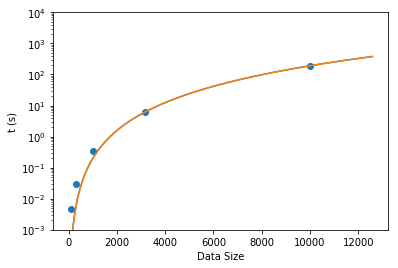

In [74]:
fig = figure()
ax = plt.gca()

x = np.logspace(2,4.1,50)
y1 = func1(x, popt1[0], popt1[1])
y2 = func2(x, popt2[0], popt2[1])
ax.plot(x,y1)
ax.plot(x,y2)

ax.scatter(n,t)
ax.set_yscale("log")
#ax.set_xscale("log")
ylim(1e-3,1e4)
#xlim(0,40000)

xlabel("Data Size")
ylabel("t (s)")





In [86]:
Trelat = []
Step = []

for i in range(4):
    Trelat.append(t[i+1]/t[i])
    Step.append(i)

In [87]:
popt3, pcov3 = scipy.optimize.curve_fit(func3, Step, Trelat, p0=(1,2,6))

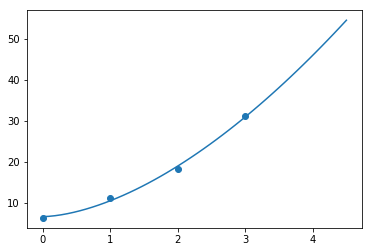

In [91]:
scatter(Step,Trelat)

x = np.linspace(0,4.5,50)
y = func3(x, popt3[0],popt3[1],popt3[2])

plot(x,y)